In [87]:
import numpy as np
import numpy.random as nr
import pandas as pd

## matplotlib with display of graphs inline
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [88]:
nr.seed(560)
covariance = np.array([[10.0,0.0],[0.0,5.0]])
uncorrelated_data = nr.multivariate_normal(mean=[0.0,0.0], cov=covariance, size=700)
uncorrelated_data

array([[-1.49414729,  1.19658562],
       [-1.21753804, -3.08415743],
       [-1.03149055, -0.40644755],
       ...,
       [-5.77445249, -1.09812346],
       [-3.26598419,  3.40412339],
       [ 0.19057516,  1.62350816]])

In [89]:
uncorrelated_OLS_model = sm.OLS(uncorrelated_data[:,0],uncorrelated_data[:,1]).fit()
print(uncorrelated_OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.607
Date:                Fri, 03 Jan 2020   Prob (F-statistic):                       0.205
Time:                        14:21:28   Log-Likelihood:                         -1804.3
No. Observations:                 700   AIC:                                      3611.
Df Residuals:                     699   BIC:                                      3615.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

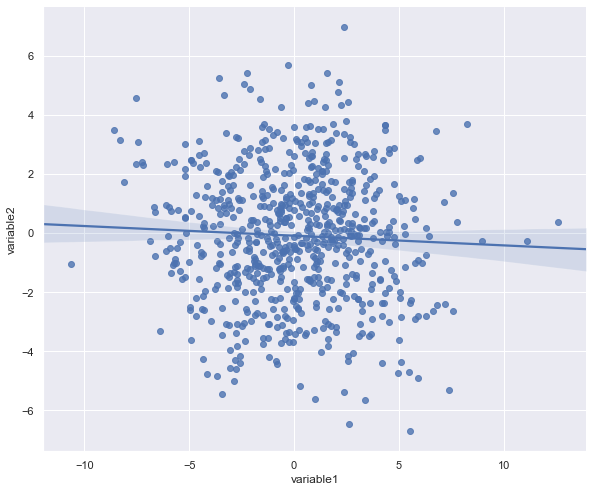

In [90]:
data_frame = pd.DataFrame(uncorrelated_data, columns=['variable1','variable2'])

sns.set(color_codes=True)
g = sns.lmplot(x='variable1', y='variable2', data=data_frame, size=7, aspect = 1.2)

In [91]:
indx_base = range(700)
slopes=[]
numbers=[]
p_values=[]
for i in range(6,500):
    temp_model = sm.OLS(uncorrelated_data[:i,0],uncorrelated_data[:i,1]).fit()
    slopes.append(temp_model._results.params[0])
    p_values.append(temp_model._results.pvalues[0])
    numbers.append(i)

Text(0, 0.5, 'slope')

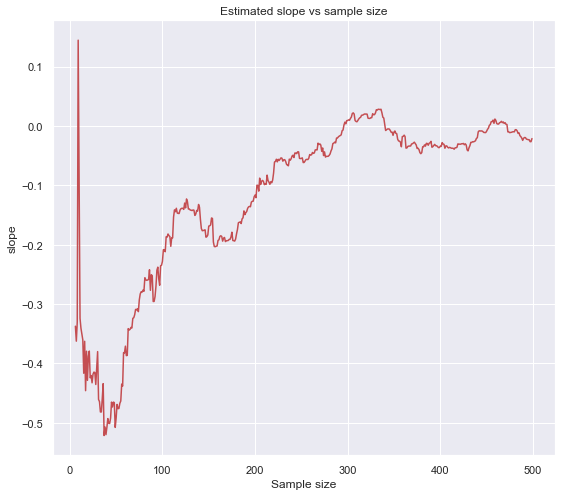

In [92]:
## Plot slopes vs. sample size
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(numbers, slopes, 'r')
ax.set_title('Estimated slope vs sample size') # Give the plot a main title
ax.set_xlabel('Sample size') # Set text for the x axis
ax.set_ylabel('slope') # Set text for y axis

Text(0, 0.5, 'p-value')

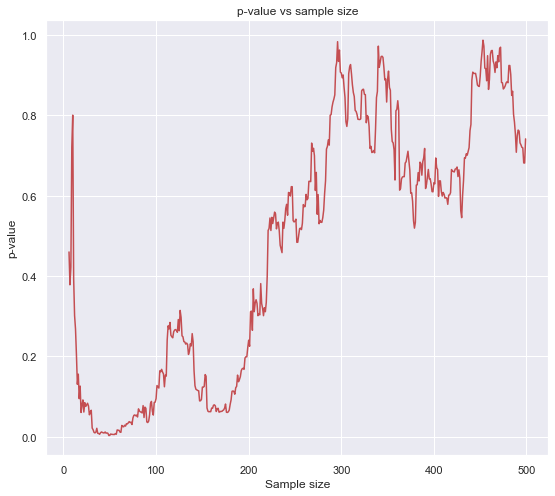

In [93]:
## Plot p-values vs. sample size
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(numbers, p_values, 'r')
ax.set_title('p-value vs sample size') # Give the plot a main title
ax.set_xlabel('Sample size') # Set text for the x axis
ax.set_ylabel('p-value') # Set text for y axis